In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# **Load Data**

In [22]:

df_movie = pd.read_csv('/content/sample_data/movies.dat', sep="::", engine='python', encoding='latin1', names=['MovieID', 'Title', 'Genres'])
df_ratings = pd.read_csv("/content/sample_data/ratings.dat", sep="::", engine="python", encoding='latin1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
df_users = pd.read_csv("/content/sample_data/users.dat", sep="::", engine="python", encoding='latin1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])


# **Drop missing values (though there may not be any in these datasets)**

In [23]:

df_movie.dropna(inplace=True)
df_ratings.dropna(inplace=True)
df_users.dropna(inplace=True)

# **Drop missing values (though there may not be any in these datasets)**

In [24]:

df_movie.dropna(inplace=True)
df_ratings.dropna(inplace=True)
df_users.dropna(inplace=True)

## **Encode Gender**

In [25]:

labelencoder = LabelEncoder()
df_users['Gender'] = labelencoder.fit_transform(df_users['Gender'])

## **Merge datasets on UserID and MovieID**

In [26]:

df_data = pd.merge(pd.merge(df_ratings, df_users, on='UserID'), df_movie, on='MovieID')

## **Drop unnecessary columns**

In [27]:

df_data = df_data.drop(["Occupation", "Zip-code", "Timestamp", "Title", "Genres"], axis=1)

# **Prepare input and target data**

In [28]:

input_data = df_data.drop(['Rating'], axis=1)
target = df_data['Rating']


## **Scale data**

In [29]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)
scaled_df = pd.DataFrame(scaled_data, columns=input_data.columns)

## **Split data into training and testing sets**

In [30]:

X_train, X_test, Y_train, Y_test = train_test_split(scaled_df, target, test_size=0.3, random_state=42)

## **Train Logistic Regression model**

In [31]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)



LogisticRegression(max_iter=1000)

## **Predict and print results**

In [32]:

predictions = model.predict(X_test)
print(predictions)

[4 4 4 ... 4 4 4]


## **Plot data**

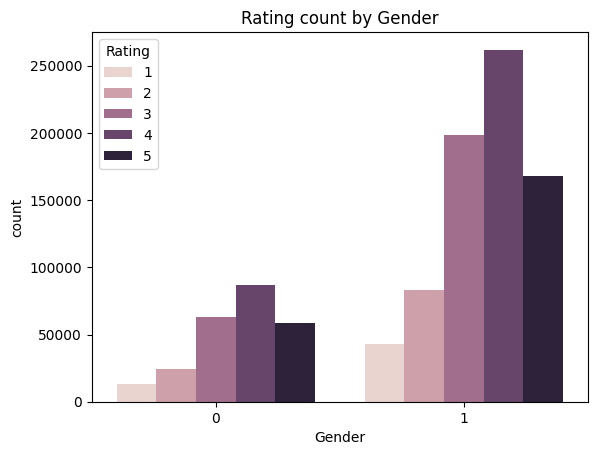

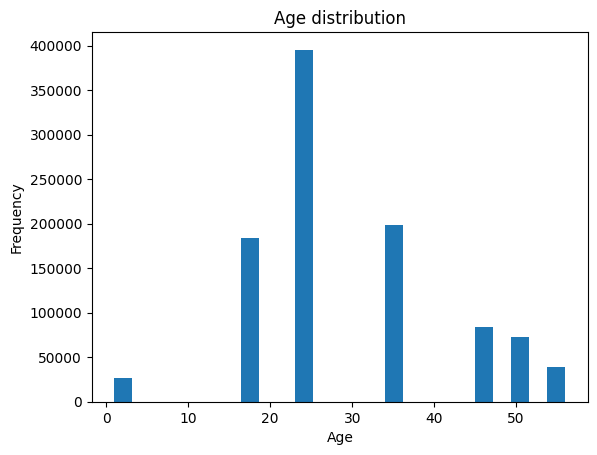

In [33]:

sns.countplot(x='Gender', hue='Rating', data=df_data)
plt.title('Rating count by Gender')
plt.show()
df_data['Age'].plot.hist(bins=25)
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.title('Age distribution')
plt.show()


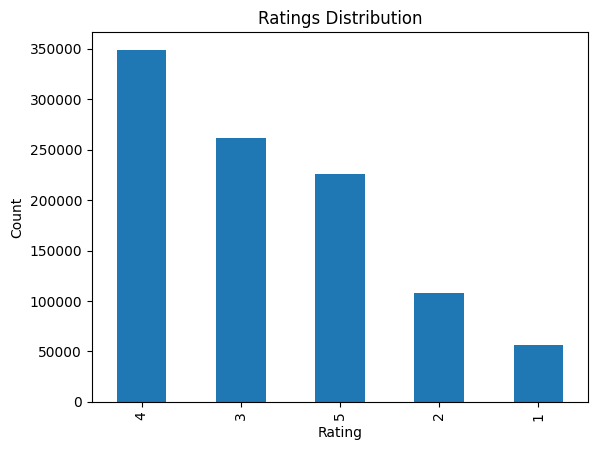

In [34]:
df_data['Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


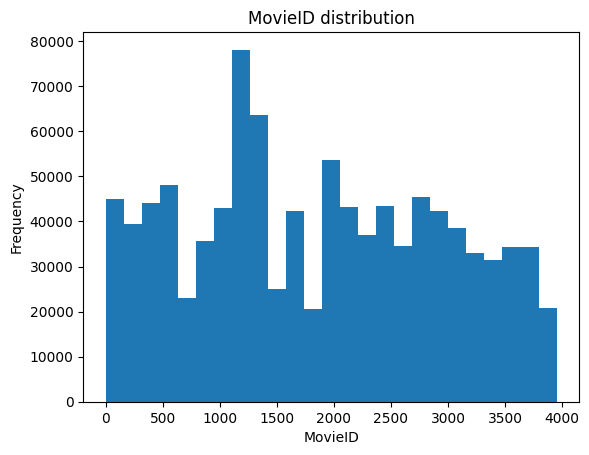

In [35]:
df_data['MovieID'].plot.hist(bins=25)
plt.xlabel("MovieID")
plt.ylabel("Frequency")
plt.title('MovieID distribution')
plt.show()


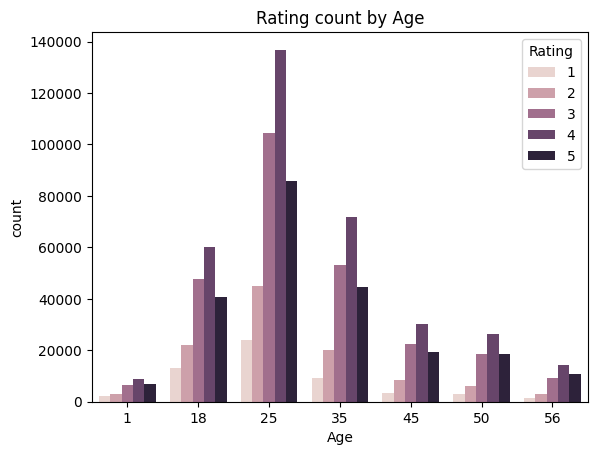

In [36]:
sns.countplot(x='Age', hue='Rating', data=df_data)
plt.title('Rating count by Age')
plt.show()